In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from mlxtend.preprocessing import TransactionEncoder

Dataset inspection..

In [44]:
df = pd.read_csv('dataset/basket_analysis.csv')

In [49]:
print("=== Head of DataFrame ===")
display(df.head())

print("\n=== DataFrame Info ===")
df.info()

print("\n=== Missing Values ===")
display(df.isnull().sum())

# print("\n=== Number of Unique Items ===")
# print(df['itemDescription'].nunique())

# print("\n=== Top 10 Most Frequent Items ===")
# display(df['itemDescription'].value_counts().head(10))

# print("\n=== Number of Duplicated Rows ===")
# print(df.duplicated().sum())

=== Head of DataFrame ===


,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Garlic,Onion,Sugar,Broccoli,Yogurt,Chocolate
0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False



=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Apple         999 non-null    bool 
 1   Bread         999 non-null    bool 
 2   Butter        999 non-null    bool 
 3   Cheese        999 non-null    bool 
 4   Corn          999 non-null    bool 
 5   Dill          999 non-null    bool 
 6   Eggs          999 non-null    bool 
 7   Ice cream     999 non-null    bool 
 8   Kidney Beans  999 non-null    bool 
 9   Milk          999 non-null    bool 
 10  Garlic        999 non-null    bool 
 11  Onion         999 non-null    bool 
 12  Sugar         999 non-null    bool 
 13  Broccoli      999 non-null    bool 
 14  Yogurt        999 non-null    bool 
 15  Chocolate     999 non-null    bool 
dtypes: bool(16)
memory usage: 15.7 KB

=== Missing Values ===


Apple           0
Bread           0
Butter          0
Cheese          0
Corn            0
Dill            0
Eggs            0
Ice cream       0
Kidney Beans    0
Milk            0
Garlic          0
Onion           0
Sugar           0
Broccoli        0
Yogurt          0
Chocolate       0
dtype: int64

dataset processing

for groceries_dataset.csv

In [ ]:
transactions = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).tolist()

print(f"Total transactions: {len(transactions)}")
print("\nSample transactions:")
for t in transactions[:5]:
    print(t)

Total transactions: 14963

Sample transactions:
['sausage', 'whole milk', 'semi-finished bread', 'yogurt']
['whole milk', 'pastry', 'salty snack']
['canned beer', 'misc. beverages']
['sausage', 'hygiene articles']
['soda', 'pickled vegetables']


for basket_analysis.csv

In [48]:
# Drop index column if needed
df = df.drop(columns=['Unnamed: 0'])

# Convert rows to item lists
transactions = df.apply(lambda row: [item for item in df.columns if row[item]], axis=1).tolist()

print(f"Total transactions: {len(transactions)}")
print("Sample transaction:", transactions[0])


Total transactions: 999
Sample transaction: ['Bread', 'Corn', 'Dill', 'Ice cream', 'Sugar', 'Yogurt', 'Chocolate']


setup

In [52]:
from itertools import combinations
from collections import defaultdict

min_support = 0.01  # 1%
min_confidence = 0.6  # 60%
num_transactions = len(transactions)

def support_count(itemset, transactions):
    return sum(1 for t in transactions if itemset.issubset(t))

def get_frequent_items(transactions, min_support):
    item_counts = defaultdict(int)
    for t in transactions:
        for item in t:
            item_counts[frozenset([item])] += 1

    frequent_items = {}
    for itemset, count in item_counts.items():
        support = count / num_transactions
        if support >= min_support:
            frequent_items[itemset] = support
    return frequent_items


In [53]:
L1 = get_frequent_items(transactions, min_support)

print("Step 1: Frequent 1-itemsets (L1)")
for itemset, support in L1.items():
    print(f"{set(itemset)} - Support: {support:.2f}")


Step 1: Frequent 1-itemsets (L1)
{'Bread'} - Support: 0.38
{'Corn'} - Support: 0.41
{'Dill'} - Support: 0.40
{'Ice cream'} - Support: 0.41
{'Sugar'} - Support: 0.41
{'Yogurt'} - Support: 0.42
{'Chocolate'} - Support: 0.42
{'Milk'} - Support: 0.41
{'Apple'} - Support: 0.38
{'Butter'} - Support: 0.42
{'Cheese'} - Support: 0.40
{'Garlic'} - Support: 0.40
{'Onion'} - Support: 0.40
{'Broccoli'} - Support: 0.39
{'Eggs'} - Support: 0.38
{'Kidney Beans'} - Support: 0.41


In [54]:
def generate_candidates(prev_freq_sets, k):
    prev_sets = list(prev_freq_sets)
    candidates = set()
    for i in range(len(prev_sets)):
        for j in range(i+1, len(prev_sets)):
            union = prev_sets[i] | prev_sets[j]
            if len(union) == k:
                candidates.add(union)
    return candidates

def filter_frequent(candidates, transactions, min_support):
    counts = {}
    for candidate in candidates:
        count = support_count(candidate, transactions)
        support = count / num_transactions
        if support >= min_support:
            counts[candidate] = support
    return counts

C2 = generate_candidates(L1.keys(), 2)
L2 = filter_frequent(C2, transactions, min_support)

print("\nStep 2: Frequent 2-itemsets (L2)")
for itemset, support in L2.items():
    print(f"{set(itemset)} - Support: {support:.2f}")



Step 2: Frequent 2-itemsets (L2)
{'Onion', 'Apple'} - Support: 0.17
{'Dill', 'Apple'} - Support: 0.18
{'Yogurt', 'Garlic'} - Support: 0.19
{'Garlic', 'Ice cream'} - Support: 0.19
{'Butter', 'Cheese'} - Support: 0.18
{'Dill', 'Eggs'} - Support: 0.16
{'Kidney Beans', 'Ice cream'} - Support: 0.20
{'Onion', 'Corn'} - Support: 0.18
{'Kidney Beans', 'Bread'} - Support: 0.17
{'Bread', 'Cheese'} - Support: 0.17
{'Dill', 'Garlic'} - Support: 0.17
{'Broccoli', 'Apple'} - Support: 0.17
{'Bread', 'Apple'} - Support: 0.15
{'Sugar', 'Milk'} - Support: 0.19
{'Kidney Beans', 'Eggs'} - Support: 0.17
{'Eggs', 'Apple'} - Support: 0.16
{'Chocolate', 'Sugar'} - Support: 0.19
{'Onion', 'Sugar'} - Support: 0.19
{'Cheese', 'Milk'} - Support: 0.17
{'Kidney Beans', 'Apple'} - Support: 0.18
{'Broccoli', 'Ice cream'} - Support: 0.19
{'Dill', 'Chocolate'} - Support: 0.20
{'Yogurt', 'Ice cream'} - Support: 0.18
{'Garlic', 'Bread'} - Support: 0.17
{'Dill', 'Cheese'} - Support: 0.18
{'Kidney Beans', 'Dill'} - Suppor

In [55]:
C3 = generate_candidates(L2.keys(), 3)
L3 = filter_frequent(C3, transactions, min_support)

print("\nStep 3: Frequent 3-itemsets (L3)")
for itemset, support in L3.items():
    print(f"{set(itemset)} - Support: {support:.2f}")



Step 3: Frequent 3-itemsets (L3)
{'Chocolate', 'Butter', 'Ice cream'} - Support: 0.11
{'Eggs', 'Sugar', 'Milk'} - Support: 0.08
{'Bread', 'Chocolate', 'Sugar'} - Support: 0.09
{'Ice cream', 'Apple', 'Milk'} - Support: 0.08
{'Kidney Beans', 'Sugar', 'Milk'} - Support: 0.09
{'Eggs', 'Garlic', 'Ice cream'} - Support: 0.07
{'Cheese', 'Broccoli', 'Apple'} - Support: 0.08
{'Chocolate', 'Bread', 'Cheese'} - Support: 0.09
{'Kidney Beans', 'Dill', 'Butter'} - Support: 0.09
{'Kidney Beans', 'Eggs', 'Cheese'} - Support: 0.09
{'Yogurt', 'Chocolate', 'Cheese'} - Support: 0.09
{'Kidney Beans', 'Dill', 'Broccoli'} - Support: 0.08
{'Kidney Beans', 'Corn', 'Milk'} - Support: 0.11
{'Kidney Beans', 'Butter', 'Chocolate'} - Support: 0.10
{'Ice cream', 'Chocolate', 'Milk'} - Support: 0.10
{'Corn', 'Butter', 'Ice cream'} - Support: 0.10
{'Dill', 'Bread', 'Cheese'} - Support: 0.07
{'Kidney Beans', 'Dill', 'Bread'} - Support: 0.07
{'Butter', 'Chocolate', 'Garlic'} - Support: 0.10
{'Broccoli', 'Eggs', 'Chocol

In [56]:
def generate_association_rules(frequent_itemsets, transactions, min_confidence):
    rules = []
    for itemset in frequent_itemsets:
        if len(itemset) < 2:
            continue
        subsets = list(combinations(itemset, len(itemset) - 1))
        for antecedent in subsets:
            antecedent = frozenset(antecedent)
            consequent = itemset - antecedent
            if consequent:
                conf = support_count(itemset, transactions) / support_count(antecedent, transactions)
                if conf >= min_confidence:
                    rules.append((set(antecedent), set(consequent), conf))
    return rules

print("\nStep 4: Strong Association Rules (Confidence ≥ 60%)")
rules = generate_association_rules(L3.keys(), transactions, min_confidence)
for ant, cons, conf in rules:
    print(f"{ant} => {cons} (Confidence: {conf:.2f})")



Step 4: Strong Association Rules (Confidence ≥ 60%)


{'Dill', 'Milk'} => {'Chocolate'} (Confidence: 0.60)
{'Dill', 'Broccoli'} => {'Chocolate'} (Confidence: 0.60)


In [26]:
print(f"\nTotal L1 itemsets: {len(L1)}")
print(f"Total L2 itemsets: {len(L2)}")
print(f"Total L3 candidates: {len(C3)}")
print(f"Total L3 frequent itemsets: {len(L3)}")



Total L1 itemsets: 64
Total L2 itemsets: 5
Total L3 candidates: 6
Total L3 frequent itemsets: 0


In [43]:
print("\nL3 Candidate Itemsets and Their Supports:")
for itemset in C3:
    count = support_count(itemset, transactions)
    support = count / num_transactions
    print(f"{set(itemset)} - Support: {support:.4f} ({count})")



L3 Candidate Itemsets and Their Supports:
{'rolls/buns', 'whole milk', 'soda'} - Support: 0.0010 (15)
{'rolls/buns', 'whole milk', 'other vegetables'} - Support: 0.0012 (18)
{'whole milk', 'soda', 'yogurt'} - Support: 0.0009 (14)
{'whole milk', 'other vegetables', 'yogurt'} - Support: 0.0011 (17)
{'whole milk', 'other vegetables', 'soda'} - Support: 0.0011 (17)
{'rolls/buns', 'whole milk', 'yogurt'} - Support: 0.0013 (20)


choosing good min_support

In [32]:
from collections import Counter

# Flatten the transaction list
all_items = [item for transaction in transactions for item in set(transaction)]
item_counts = Counter(all_items)


In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert to DataFrame
item_df = pd.DataFrame(item_counts.items(), columns=['item', 'count'])
item_df['support'] = item_df['count'] / len(transactions)
item_df = item_df.sort_values(by='support', ascending=False)

# Show top 10
print(item_df.head(10))


                item  count   support
1         whole milk   2363  0.157923
17  other vegetables   1827  0.122101
13        rolls/buns   1646  0.110005
10              soda   1453  0.097106
0             yogurt   1285  0.085879
24   root vegetables   1041  0.069572
20    tropical fruit   1014  0.067767
37     bottled water    908  0.060683
3            sausage    903  0.060349
65      citrus fruit    795  0.053131


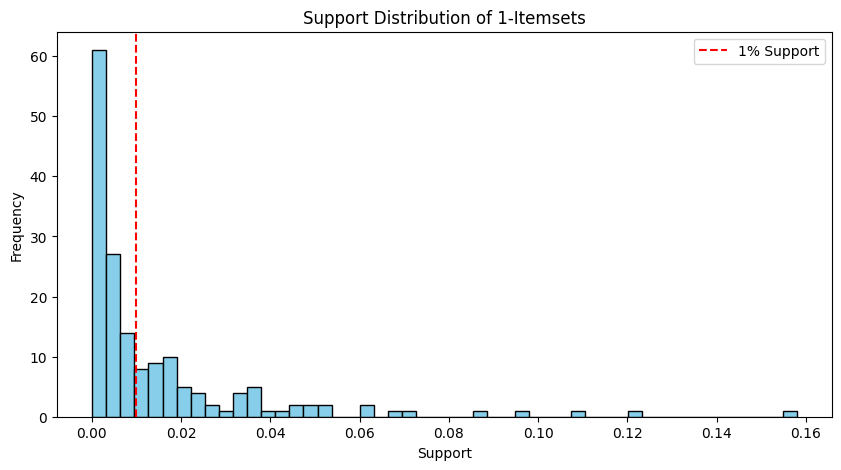

In [34]:
plt.figure(figsize=(10, 5))
plt.hist(item_df['support'], bins=50, color='skyblue', edgecolor='black')
plt.axvline(x=0.01, color='red', linestyle='--', label='1% Support')
plt.title('Support Distribution of 1-Itemsets')
plt.xlabel('Support')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [35]:
q90 = item_df['support'].quantile(0.90)  # Support threshold that captures top 10% of items
q95 = item_df['support'].quantile(0.95)  # Top 5%
q98 = item_df['support'].quantile(0.98)  # Top 2%

print(f"Suggested min_supports based on data:")
print(f"Top 10% items: support ≥ {q90:.4f}")
print(f"Top 5% items:  support ≥ {q95:.4f}")
print(f"Top 2% items:  support ≥ {q98:.4f}")


Suggested min_supports based on data:
Top 10% items: support ≥ 0.0382
Top 5% items:  support ≥ 0.0582
Top 2% items:  support ≥ 0.0935
